**IMPORT NECESSARY LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter as с 
import missingno as msno 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
#from sklearn. linear_model import LogisticRegression 
#import pickle 

**READ THE DATASET**

In [2]:
f1=pd.read_csv("chronickidneydisease.csv")

In [3]:
f1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
f1.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
#dropping column 'id' as it is unnecessary
f1.drop(["id"], axis=1, inplace=True)

In [6]:
f1.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
#rename column names
f1.columns=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
            'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin', 'packed_cell_volume', 
            'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
            'pedal_edema' , 'anemia', 'class'] 
cols=f1.columns
cols

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

**UNDERSTANDING THE DATATYPE**

In [8]:
#target column - find unique elements of the array/column
f1['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [9]:
#rectifying the unknown class in the dataset
f1['class']=f1['class'].replace("ckd\t", "ckd")
f1['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [10]:
#target column
f1['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [11]:
f1['coronary_artery_disease'].value_counts()

no      362
yes      34
\tno      2
Name: coronary_artery_disease, dtype: int64

In [12]:
#rectifying column
f1['coronary_artery_disease']=f1['coronary_artery_disease'].replace("\tno", "no")
f1['coronary_artery_disease'].value_counts()

no     364
yes     34
Name: coronary_artery_disease, dtype: int64

In [13]:
f1['diabetesmellitus'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: diabetesmellitus, dtype: int64

In [14]:
#rectifying column
f1['diabetesmellitus']=f1['diabetesmellitus'].replace("\tno", "no")
f1['diabetesmellitus']=f1['diabetesmellitus'].replace("\tyes", "yes")
f1['diabetesmellitus']=f1['diabetesmellitus'].replace(" yes", "yes")
f1['diabetesmellitus'].value_counts()

no     261
yes    137
Name: diabetesmellitus, dtype: int64

**CHECK CATEGORICAL AND NUMERICAL DATA**

In [15]:
num_cols = f1.select_dtypes(include='number').columns
num_cols

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin'],
      dtype='object')

In [16]:
cat_cols= f1.select_dtypes(include='object').columns
cat_cols

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'hypertension', 'diabetesmellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anemia', 'class'],
      dtype='object')

**HANDLING THE MISSING VALUES**

In [17]:
#conversion of numerical data(string format to numeric)
f1.packed_cell_volume = pd.to_numeric(f1.packed_cell_volume, errors="coerce")
f1.white_blood_cell_count = pd.to_numeric(f1.white_blood_cell_count, errors="coerce")
f1.red_blood_cell_count = pd.to_numeric(f1.red_blood_cell_count, errors="coerce")

In [18]:
#check if any column is null
'''
True : null present
False: non-null
'''
f1.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [19]:
#handle missing values
f1[ "blood_pressure"].fillna(f1["blood_pressure"].mean(),inplace=True)
f1[ "blood_glucose_random"].fillna(f1["blood_glucose_random"].mean(),inplace=True)
f1[ "blood_urea"].fillna(f1["blood_urea"].mean(),inplace=True)
f1[ "serum_creatinine"].fillna(f1["serum_creatinine"].mean(),inplace=True)
f1[ "sodium"].fillna(f1["sodium"].mean(),inplace=True)
f1[ "potassium"].fillna(f1["potassium"].mean(),inplace=True)
f1[ "hemoglobin"].fillna(f1["hemoglobin"].mean(),inplace=True)
f1[ "packed_cell_volume"].fillna(f1["packed_cell_volume"].mean(),inplace=True)
f1[ "white_blood_cell_count"].fillna(f1["white_blood_cell_count"].mean(),inplace=True)
f1[ "red_blood_cell_count"].fillna(f1["red_blood_cell_count"].mean(),inplace=True) 

In [20]:
#handle missing values
f1[ "age"].fillna(f1["age"].mode()[0],inplace=True)
f1[ "specific_gravity"].fillna(f1["specific_gravity"].mode()[0],inplace=True)
f1[ "albumin"].fillna(f1["albumin"].mode()[0],inplace=True)
f1[ "sugar"].fillna(f1["sugar"].mode()[0],inplace=True)
f1[ "red_blood_cells"].fillna(f1["red_blood_cells"].mode()[0],inplace=True)
f1[ "pus_cell"].fillna(f1["pus_cell"].mode()[0],inplace=True)
f1[ "pus_cell_clumps"].fillna(f1["pus_cell_clumps"].mode()[0],inplace=True)
f1[ "bacteria"].fillna(f1["bacteria"].mode()[0],inplace=True)
f1[ "diabetesmellitus"].fillna(f1["diabetesmellitus"].mode()[0],inplace=True)
f1[ "coronary_artery_disease"].fillna(f1["coronary_artery_disease"].mode()[0],inplace=True) 
f1[ "appetite"].fillna(f1["appetite"].mode()[0],inplace=True) 
f1[ "pedal_edema"].fillna(f1["pedal_edema"].mode()[0],inplace=True) 
f1[ "anemia"].fillna(f1["anemia"].mode()[0],inplace=True)
f1[ "hypertension"].fillna(f1["hypertension"].mode()[0],inplace=True)

In [21]:
f1.isnull().any()

age                        False
blood_pressure             False
specific_gravity           False
albumin                    False
sugar                      False
red_blood_cells            False
pus_cell                   False
pus_cell_clumps            False
bacteria                   False
blood_glucose_random       False
blood_urea                 False
serum_creatinine           False
sodium                     False
potassium                  False
hemoglobin                 False
packed_cell_volume         False
white_blood_cell_count     False
red_blood_cell_count       False
hypertension               False
diabetesmellitus           False
coronary_artery_disease    False
appetite                   False
pedal_edema                False
anemia                     False
class                      False
dtype: bool

**LABEL ENCODING**

In [22]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
for i in cat_cols: 
   print("LABEL ENCODING OF: ",i)
   encod=LabelEncoder()
   print(Counter(f1[i])) 
   f1[i] = encod.fit_transform(f1[i])  
   print(Counter(f1[i])) 
   print("*"*100)

LABEL ENCODING OF:  red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
Counter({1: 353, 0: 47})
****************************************************************************************************
LABEL ENCODING OF:  pus_cell
Counter({'normal': 324, 'abnormal': 76})
Counter({1: 324, 0: 76})
****************************************************************************************************
LABEL ENCODING OF:  pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
Counter({0: 358, 1: 42})
****************************************************************************************************
LABEL ENCODING OF:  bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF:  packed_cell_volume
Counter({38.88449848024316: 71, 52.0: 21, 41.0: 21, 44.0: 19, 48.0: 19, 40.0: 16, 43.0: 15, 45.0: 13, 42.0: 13, 32.0: 12, 36.0: 12, 33.0: 12, 28.0: 12, 50.0:

**SPLITTING THE DATA IN INDEPENDENT AND DEPENDENT VARIABLES**

In [23]:
xcols=['red_blood_cells', 'pus_cell', 'blood_glucose_random', 'blood_urea', 'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease']

x=pd.DataFrame(f1, columns=xcols)
y=pd.DataFrame(f1, columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


**SPLIT INTO TRAIN AND TEST SET**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=2) 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(280, 8)
(280, 1)
(120, 8)
(120, 1)


**MODEL BUILDING**

**a) LOGISTIC REGRESSION**

In [25]:
from sklearn. linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [26]:
#training score
logreg.score(x_train,y_train)

0.9142857142857143

In [27]:
#testing accuracy
logreg.score(x_test,y_test)

0.9083333333333333

In [28]:
y_pred_log=logreg.predict(x_test)

In [29]:
#accuracy
from sklearn.metrics import accuracy_score
log_acc=accuracy_score(y_test, y_pred_log)
print('Accuracy: {0:.3f}'.format(log_acc))

Accuracy: 0.908


**b) KNN CLASSIFIER**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knnclass= KNeighborsClassifier(n_neighbors=5)
knnclass.fit(x_train, y_train.values.ravel())

KNeighborsClassifier()

In [31]:
#training score
knnclass.score(x_train,y_train)

0.8714285714285714

In [32]:
#testing accuracy
knnclass.score(x_test,y_test)

0.85

In [33]:
y_pred_knn=knnclass.predict(x_test)

In [34]:
knn_acc=accuracy_score(y_test, y_pred_knn)
print('Accuracy: {0:.3f}'.format(knn_acc))

Accuracy: 0.850


**c) RANDOM FOREST**

In [35]:
from sklearn.ensemble import RandomForestClassifier
rand_forest= RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
rand_forest.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=80,
                       n_jobs=-1, oob_score=True, random_state=101)

In [36]:
#training score
rand_forest.score(x_train,y_train)

0.8821428571428571

In [37]:
#testing accuracy
rand_forest.score(x_test,y_test)

0.8916666666666667

In [38]:
y_pred_randforest=rand_forest.predict(x_test)

In [39]:
rand_forest_acc=accuracy_score(y_test, y_pred_randforest)
print('Accuracy: {0:.3f}'.format(rand_forest_acc))

Accuracy: 0.892


**MODEL EVALUATION**

In [40]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

**a) LOGISTIC REGRESSION**

In [41]:
mae_log=mean_absolute_error(y_test, y_pred_log)

In [42]:
mse_log=mean_squared_error(y_test, y_pred_log, squared=False)

In [43]:
clsrep_log=classification_report(y_test, y_pred_log)

In [44]:
print("LOGISTIC REGRESSION:\n")
print('Accuracy             : {0:.3f}'.format(log_acc))
print("MAE                  : ",mae_log)
print("MSE                  : ",mse_log)
print("Classification Report: ", clsrep_log)
#print(classification_report(y_test, y_pred_log))


LOGISTIC REGRESSION:

Accuracy             : 0.908
MAE                  :  0.09166666666666666
MSE                  :  0.30276503540974914
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.88      0.93        78
           1       0.82      0.95      0.88        42

    accuracy                           0.91       120
   macro avg       0.89      0.92      0.90       120
weighted avg       0.92      0.91      0.91       120



Confusion Matrix for Logistic Regression: 


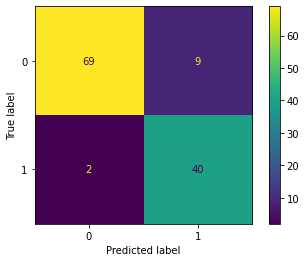

In [45]:
#confusion matrix
cm_log= confusion_matrix(y_test, y_pred_log)
disp_log= ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=logreg.classes_)
disp_log.plot()
print("Confusion Matrix for Logistic Regression: ")
plt.show()

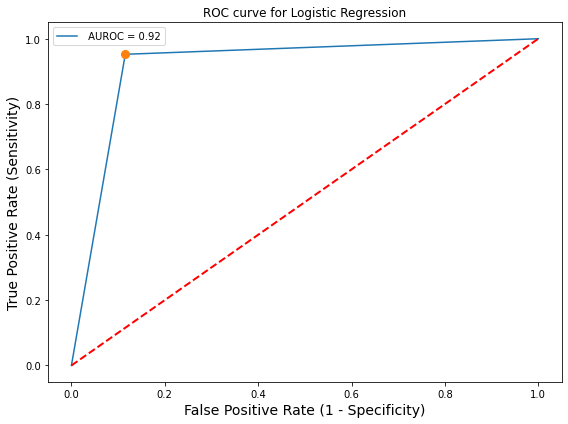

In [46]:
#roc curve
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_log)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

**b) KNN CLASSIFIER**

In [47]:
mae_knn=mean_absolute_error(y_test, y_pred_knn)

In [48]:
mse_knn=mean_squared_error(y_test, y_pred_knn, squared=False)

In [49]:
clsrep_knn=classification_report(y_test, y_pred_knn)

In [50]:
print("KNN CLASSIFIER:\n")
print('Accuracy             : {0:.3f}'.format(knn_acc))
print("MAE                  : ",mae_knn)
print("MSE                  : ",mse_knn)
print("Classification Report: ", clsrep_knn)

KNN CLASSIFIER:

Accuracy             : 0.850
MAE                  :  0.15
MSE                  :  0.3872983346207417
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.85      0.88        78
           1       0.75      0.86      0.80        42

    accuracy                           0.85       120
   macro avg       0.83      0.85      0.84       120
weighted avg       0.86      0.85      0.85       120



Confusion Matrix for KNN Classifier: 


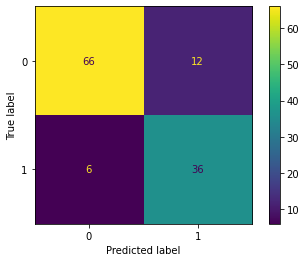

In [51]:
#confusion matrix
cm_knn= confusion_matrix(y_test, y_pred_knn)
disp_knn= ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=knnclass.classes_)
disp_knn.plot()
print("Confusion Matrix for KNN Classifier: ")
plt.show()

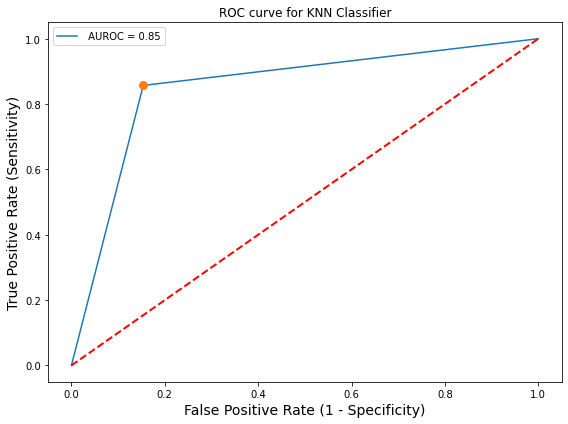

In [52]:
#roc curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_knn)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for KNN Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

**c) RANDOM FOREST**

In [53]:
mae_rand_forest=mean_absolute_error(y_test, y_pred_randforest)

In [54]:
mse_rand_forest=mean_squared_error(y_test, y_pred_randforest, squared=False)

In [55]:
clsrep_rand_forest=classification_report(y_test, y_pred_randforest)

In [56]:
print("RANDOM FOREST CLASSIFIER:\n")
print('Accuracy             : {0:.3f}'.format(rand_forest_acc))
print("MAE                  : ",mae_rand_forest)
print("MSE                  : ",mse_rand_forest)
print("Classification Report: ", clsrep_rand_forest)

RANDOM FOREST CLASSIFIER:

Accuracy             : 0.892
MAE                  :  0.10833333333333334
MSE                  :  0.32914029430219166
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.87      0.91        78
           1       0.80      0.93      0.86        42

    accuracy                           0.89       120
   macro avg       0.88      0.90      0.88       120
weighted avg       0.90      0.89      0.89       120



Confusion Matrix for Random Forest Classifier: 


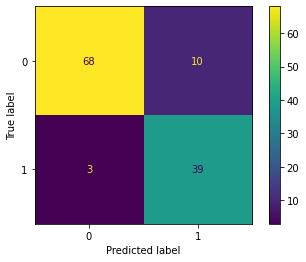

In [57]:
#confusion matrix
cm_rand_forest= confusion_matrix(y_test, y_pred_randforest)
disp_rand_forest= ConfusionMatrixDisplay(confusion_matrix=cm_rand_forest,display_labels=rand_forest.classes_)
disp_rand_forest.plot()
print("Confusion Matrix for Random Forest Classifier: ")
plt.show()

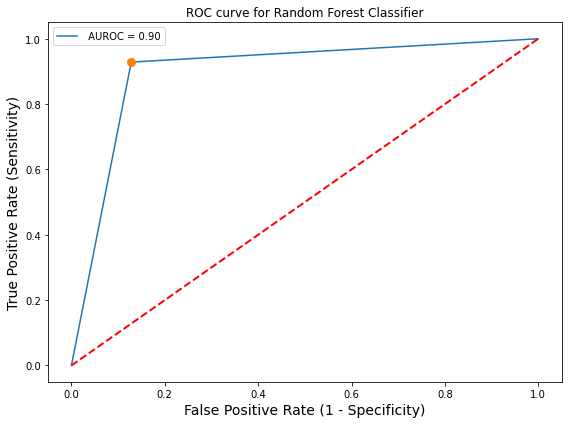

In [58]:
#roc curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_randforest)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Random Forest Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

***LOGISTIC REGRESSION MODEL HAS HIGH ACCURACY***
